In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import scipy as sp
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from subprocess import check_output
print(pa.__version__)

11.0.0


In [13]:
df_train = pd.read_csv("../data/raw/train.csv", engine="pyarrow")
df_test = pd.read_csv("../data/raw/test.csv", engine="pyarrow")

In [15]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<h3>Part I: Exploratory Analysis </h3>

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<p>We need to compare both test and train datasets to make sure they have similar distributions </p>

In [21]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: xlabel='Fare', ylabel='Proportion'>

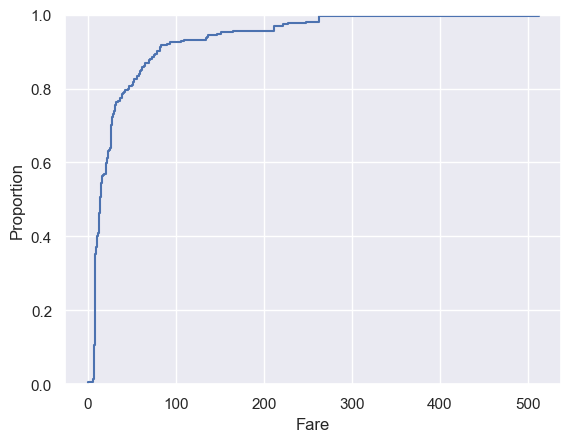

In [25]:
sns.ecdfplot(data=df_test, x="Fare")

<Axes: xlabel='Fare', ylabel='Proportion'>

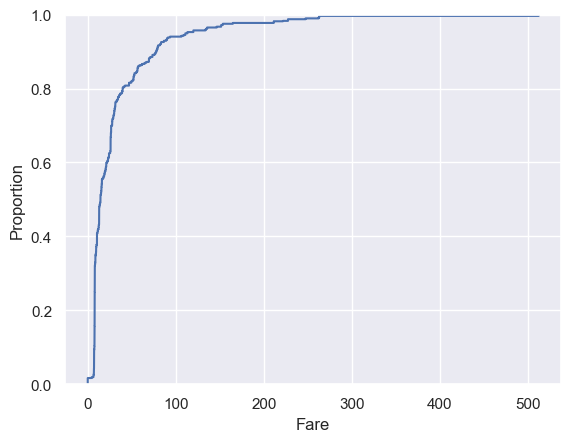

In [26]:
sns.ecdfplot(data=df_train, x="Fare")

In [31]:
difference = []
for attribute in df_test.columns:
    difference.append(sp.stats.ks_2samp(df_test[attribute], df_train[attribute]))

for index, attribute in enumerate(df_test.columns):
    print(attribute, difference[index][0])

PassengerId 1.0
Pclass 0.0295351172544155
Name 0.06143304388918424
Sex 0.01122334455667789
Age 0.03812983637545041
SibSp 0.025311595487034082
Parch 0.01417685628211944
Ticket 0.04264870931537598
Fare 0.03877960895504755
Cabin 0.025577411542323823
Embarked 0.07685037509598913


<p> All differences are lower than 0.1 for the given attributes so we can continue with the analysis </p>

<Axes: xlabel='Survived', ylabel='count'>

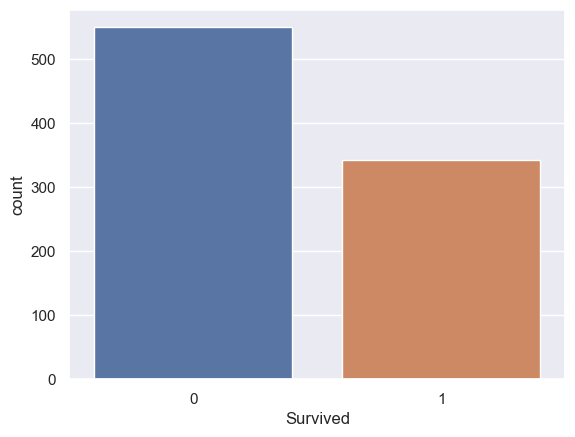

In [32]:
sns.countplot(x='Survived', data=df_train)

In [33]:
print(df_train["Survived"].sum()/df_train["Survived"].count())

0.3838383838383838


In [34]:
df_train.groupby(["Survived", "Sex"])["Survived"].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

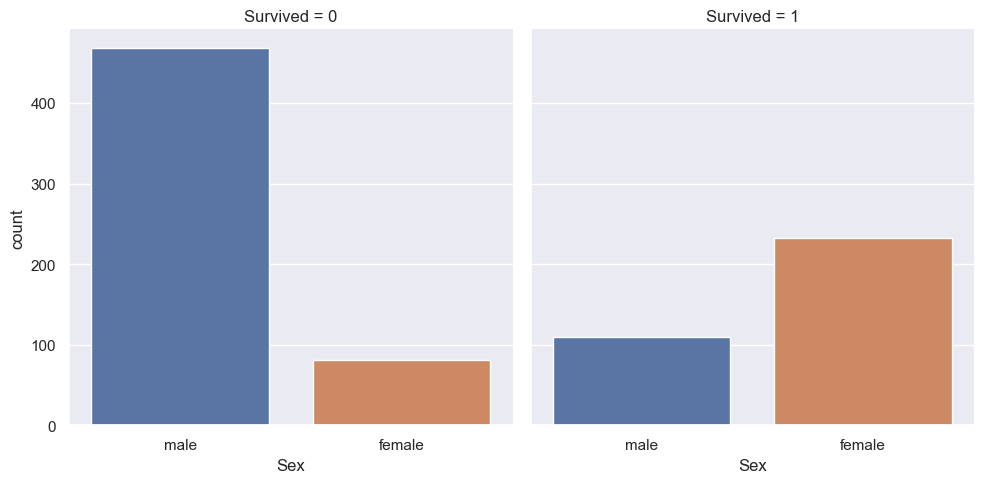

In [36]:
sns.catplot(x="Sex", col="Survived", kind="count",data=df_train)

In [43]:
print("% of women survived: " , df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print("% of men survived:   " , df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924
